[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/langchain-ai/langchain-academy/blob/main/module-1/chain.ipynb) [![Open in LangChain Academy](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66e9eba12c7b7688aa3dbb5e_LCA-badge-green.svg)](https://academy.langchain.com/courses/take/intro-to-langgraph/lessons/58238466-lesson-4-chain)

# Chain

## Review

We built a simple graph with nodes, normal edges, and conditional edges.

## Goals

Now, let's build up to a simple chain that combines 4 [concepts](https://python.langchain.com/v0.2/docs/concepts/):

* Using [chat messages](https://python.langchain.com/v0.2/docs/concepts/#messages) as our graph state
* Using [chat models](https://python.langchain.com/v0.2/docs/concepts/#chat-models) in graph nodes
* [Binding tools](https://python.langchain.com/v0.2/docs/concepts/#tools) to our chat model
* [Executing tool calls](https://python.langchain.com/v0.2/docs/concepts/#functiontool-calling) in graph nodes 

![Screenshot 2024-08-21 at 9.24.03 AM.png](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66dbab08dd607b08df5e1101_chain1.png)

In [2]:
%%capture --no-stderr
%pip install --quiet -U langchain_openai langchain_core langgraph

## Messages

Chat models can use [`messages`](https://python.langchain.com/v0.2/docs/concepts/#messages), which capture different roles within a conversation. 

LangChain supports various message types, including `HumanMessage`, `AIMessage`, `SystemMessage`, and `ToolMessage`. 

These represent a message from the user, from chat model, for the chat model to instruct behavior, and from a tool call. 

Let's create a list of messages. 

Each message can be supplied with a few things:

* `content` - content of the message
* `name` - optionally, a message author 
* `response_metadata` - optionally, a dict of metadata (e.g., often populated by model provider for `AIMessages`)

In [3]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage

messages = [AIMessage(content=f"So you said you were researching ocean mammals?", name="Model")]
messages.append(HumanMessage(content=f"Yes, that's right.",name="Lance"))
messages.append(AIMessage(content=f"Great, what would you like to learn about.", name="Model"))
messages.append(HumanMessage(content=f"I want to learn about the best place to see Orcas in the US.", name="Lance"))

for m in messages:
    m.pretty_print()

================================== Ai Message ==================================
Name: Model

So you said you were researching ocean mammals?
================================ Human Message =================================
Name: Lance

Yes, that's right.
================================== Ai Message ==================================
Name: Model

Great, what would you like to learn about.
================================ Human Message =================================
Name: Lance

I want to learn about the best place to see Orcas in the US.


## Chat Models

[Chat models](https://python.langchain.com/v0.2/docs/concepts/#chat-models) can use a sequence of message as input and support message types, as discussed above.

There are [many](https://python.langchain.com/v0.2/docs/concepts/#chat-models) to choose from! Let's work with OpenAI. 

Let's check that your `OPENAI_API_KEY` is set and, if not, you will be asked to enter it.

In [4]:
import os, getpass

# definir todas as variáveis de ambiente necessárias para o Azure OpenAI
# use getpass para a chave de API e defina as demais diretamente
os.environ["OPENAI_API_KEY"] = getpass.getpass("OPENAI_API_KEY: ")
os.environ["OPENAI_API_VERSION"] = "2024-12-01-preview"
os.environ["ENDPOINT"] = "https://cog-open-ai-lab.openai.azure.com/"
os.environ["MODEL_DEPLOYMENT"] = "gpt-4o"
os.environ["MODEL_NAME"] = "gpt-4o"

# função auxiliar _set_env para a chave Tavily mais tarde (se for usar Tavily)
def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

OPENAI_API_KEY:  ········


We can load a chat model and invoke it with out list of messages.

We can see that the result is an `AIMessage` with specific `response_metadata`.

In [5]:
from langchain_openai import AzureChatOpenAI
import os

# configuração completa do AzureChatOpenAI
llm = AzureChatOpenAI(
    openai_api_version=os.getenv('OPENAI_API_VERSION'),
    azure_endpoint=os.getenv('ENDPOINT'),
    azure_deployment=os.getenv('MODEL_DEPLOYMENT'),                            
    model=os.getenv('MODEL_NAME'), 
    validate_base_url=False,
    seed=13,
    temperature=0.1,
    streaming=False # mantido como False para 'invoke'
)

result = llm.invoke(messages)
type(result)

langchain_core.messages.ai.AIMessage

In [6]:
result

AIMessage(content="The best place to see orcas in the U.S. is the Pacific Northwest, particularly around the San Juan Islands in Washington State. This area is renowned for its resident orca pods, especially during the summer months when they are most active. Here are some key details:\n\n### 1. **San Juan Islands, Washington**\n   - **Why it's great**: The San Juan Islands are home to Southern Resident orcas, which are often seen hunting for salmon in these waters. Transient orcas (Bigg's killer whales) are also frequently spotted.\n   - **Best time to visit**: May through September is the peak season for orca sightings.\n   - **How to see them**: You can take a whale-watching tour from Friday Harbor or other nearby towns. Kayaking tours are also popular for a more intimate experience.\n\n### 2. **Puget Sound, Washington**\n   - Orcas can also be seen in Puget Sound, particularly near Seattle and Tacoma. While sightings are less frequent than in the San Juan Islands, they do occur, es

O processo se resume a três etapas principais:

1. Configuração da Conexão (AzureChatOpenAI)
usamos a classe AzureChatOpenAI do LangChain para estabelecer uma conexão com um modelo de linguagem avançado (provavelmente GPT-4, como indicado nos metadados) hospedado na conta do Azure OpenAI Service.

Parâmetros como temperature=0.1 e seed=13 foram definidos para garantir que a resposta fosse factual e reproduzível.

2. Invocação da Pergunta (llm.invoke(messages))
A pergunta do usuário, "I want to learn about the best place to see Orcas in the US." (Quero saber sobre o melhor lugar para ver Orcas nos EUA.), foi enviada ao modelo.

O método .invoke() enviou o prompt para o Azure e aguardou a resposta completa.

3. Resultado e Conteúdo (AIMessage)
O objeto result é um AIMessage (o formato de resposta padrão do LangChain), que contém a resposta rica e detalhada do modelo.

Conteúdo Principal: O modelo respondeu identificando o Pacific Northwest (principalmente as Ilhas San Juan em Washington) como o melhor local e forneceu detalhes organizados sobre os melhores períodos, outros locais (como Puget Sound e Monterey Bay) e dicas de observação.

Metadados: A resposta inclui response_metadata, que mostra informações técnicas, como o uso de tokens (a unidade de custo e processamento da IA) e o nome do modelo usado (gpt-4o-2024-11-20).

Em essência, usamos a LangChain como uma "ponte" para fazer uma pergunta factual ao modelo de IA no Azure, e a saída é a resposta organizada e bem formatada do modelo.

In [7]:
result.response_metadata

{'token_usage': {'completion_tokens': 404,
  'prompt_tokens': 67,
  'total_tokens': 471,
  'completion_tokens_details': {'accepted_prediction_tokens': 0,
   'audio_tokens': 0,
   'reasoning_tokens': 0,
   'rejected_prediction_tokens': 0},
  'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}},
 'model_provider': 'openai',
 'model_name': 'gpt-4o-2024-11-20',
 'system_fingerprint': 'fp_b54fe76834',
 'id': 'chatcmpl-CXtY1GuBeWSmI2GDXxnpzyPG9Ra6b',
 'prompt_filter_results': [{'prompt_index': 0,
   'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'},
    'jailbreak': {'filtered': False, 'detected': False},
    'self_harm': {'filtered': False, 'severity': 'safe'},
    'sexual': {'filtered': False, 'severity': 'safe'},
    'violence': {'filtered': False, 'severity': 'safe'}}}],
 'finish_reason': 'stop',
 'logprobs': None,
 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'},
  'protected_material_code': {'filtered': False, 'detected':

Esse bloco de código é a seção de metadados da resposta (response_metadata) gerada pela chamada à API do modelo de Linguagem (GPT-4o) no Azure OpenAI, feita via LangChain.

Essas informações são cruciais para entender quem respondeu, quanto custou e se a resposta passou nos filtros de segurança.

Uso de Tokens e Custo
Esta é a parte mais importante para o monitoramento de custos e desempenho. Um token é uma unidade de texto (pode ser uma palavra, parte de uma palavra ou até um sinal de pontuação) usada pelos modelos de IA.

token_usage:

prompt_tokens: 67 — O número de tokens usados na sua pergunta de entrada (o prompt "I want to learn about the best place to see Orcas in the US." e o cabeçalho "Human Message = Lance").

completion_tokens: 404 — O número de tokens usados na resposta gerada pelo modelo (todo o texto sobre as Ilhas San Juan, etc.).

total_tokens: 471 — A soma dos tokens de entrada e saída. O custo da chamada é baseado nesse número.

Nota: Os campos completion_tokens_details e prompt_tokens_details são detalhes técnicos avançados, e a maioria está zerada (0) porque a chamada foi uma interação de bate-papo padrão.

Detalhes do Modelo e da API
Estes campos identificam a origem e a conclusão da resposta.

model_provider: 'openai' — Confirma que o serviço subjacente é da OpenAI (neste caso, acessado via Azure).

model_name: 'gpt-4o-2024-11-20' — Indica qual modelo específico foi usado. Neste caso, é o modelo de última geração GPT-4o na versão de novembro de 2024.

id: 'chatcmpl-...' — Um identificador único (ID) da transação de bate-papo, útil para rastreamento e logs.

system_fingerprint: 'fp_b54fe76834' — Um identificador de backend do sistema da OpenAI que serviu a solicitação.

finish_reason: 'stop' — Indica que o modelo concluiu a resposta de forma natural, o que significa que ele não foi interrompido por atingir o limite máximo de tokens ou por um filtro de segurança.

Filtros de Conteúdo (Content Filters)
Os modelos do Azure OpenAI (e da OpenAI) têm filtros de segurança integrados que verificam o prompt e a resposta quanto a conteúdo proibido (como discurso de ódio, violência, etc.).

prompt_filter_results e content_filter_results: Estes blocos mostram os resultados dos filtros de segurança, tanto para a pergunta (prompt) quanto para a resposta (content).

Para todas as categorias (hate, self_harm, sexual, violence):

filtered: False — Significa que o conteúdo não foi bloqueado.

severity: 'safe' — A avaliação da severidade é segura.

jailbreak: {'filtered': False, 'detected': False} — Indica que a pergunta não tentou contornar as regras de segurança do modelo.

Em resumo, esses metadados informam que o modelo GPT-4o gerou uma resposta segura e completa, gastando 471 tokens no total.

## Tools

Tools are useful whenever you want a model to interact with external systems.

External systems (e.g., APIs) often require a particular input schema or payload, rather than natural language. 

When we bind an API, for example, as a tool we given the model awareness of the required input schema.

The model will choose to call a tool based upon the natural language input from the user. 

And, it will return an output that adheres to the tool's schema. 

[Many LLM providers support tool calling](https://python.langchain.com/v0.1/docs/integrations/chat/) and [tool calling interface](https://blog.langchain.dev/improving-core-tool-interfaces-and-docs-in-langchain/) in LangChain is simple. 
 
You can simply pass any Python `function` into `ChatModel.bind_tools(function)`.

![Screenshot 2024-08-19 at 7.46.28 PM.png](https://cdn.prod.website-files.com/65b8cd72835ceeacd4449a53/66dbab08dc1c17a7a57f9960_chain2.png)

Let's showcase a simple example of tool calling!
 
The `multiply` function is our tool.

O Conceito de Tool Calling (Chamada de Ferramentas)
Tool Calling permite que um LLM não apenas gere texto, mas também interaja com sistemas externos (como APIs, bancos de dados, funções de código, etc.) para executar ações ou obter informações que ele não possui em seu conhecimento interno.

1. Por que precisamos de Tools?
Modelos de linguagem são ótimos para texto, mas:

Não conseguem executar código ou cálculos complexos de forma confiável.

Não conseguem acessar dados em tempo real (como o clima atual ou o preço de ações).

Não conseguem interagir com sistemas externos (como enviar um e-mail ou adicionar um item a um carrinho).

Ao fornecer uma ferramenta (Tool), você dá ao modelo a capacidade de agir.

2. Como Funciona a Conexão (Schema Awareness)
Sistemas externos (APIs) exigem uma estrutura de entrada específica, chamada schema (esquema).

Quando você "liga" uma função ao modelo (bind_tools), o LangChain (e o provedor do LLM) usam a assinatura da função (nome, parâmetros, tipos de dados e docstring) para criar esse schema.

O modelo de IA lê essa descrição e entende: "Se o usuário pedir X, eu devo chamar a ferramenta Y, que requer os parâmetros A e B."

In [9]:
def multiply(a: int, b: int) -> int:
    """Multiply a and b.

    Args:
        a: first int
        b: second int
    """
    return a * b

llm_with_tools = llm.bind_tools([multiply])

Esta é a ferramenta que o LLM usa. O LangChain extrai o schema a partir daqui:

Nome: multiply

Descrição: "Multiply a and b." (Retirada do docstring.)

Parâmetros Necessários: a (um inteiro) e b (um inteiro).

llm: É a instância do modelo (por exemplo, AzureChatOpenAI).

.bind_tools([multiply]): Este método cria uma nova versão do modelo (llm_with_tools) que agora tem consciência da função multiply.

Se um usuário fizer uma pergunta como: "Qual é o resultado de 15 vezes 3?", o modelo agora sabe que deve retornar uma instrução de Tool Call (e não uma resposta em texto) que se parece com: {"tool_name": "multiply", "a": 15, "b": 3}.


Em Resumo:
Ao usar bind_tools, transformamos um simples gerador de texto em um agente capaz de realizar cálculos (neste caso, a multiplicação) enviando os argumentos corretos para a função Python.

O processo completo de Tool Calling no LangChain é geralmente:

Usuário envia o prompt (ex: "Calcule 15 * 3").

llm_with_tools retorna um Tool Call com o nome da função e os argumentos.

Executamos a função Python (multiply(15, 3)), obtendo o resultado (45).

Enviamos o resultado de volta ao LLM.

O LLM usa o resultado (45) para gerar a resposta final em linguagem natural ao usuário (ex: "O resultado de 15 vezes 3 é 45.").

If we pass an input - e.g., `"What is 2 multiplied by 3"` - we see a tool call returned. 

The tool call has specific arguments that match the input schema of our function along with the name of the function to call.

```
{'arguments': '{"a":2,"b":3}', 'name': 'multiply'}
```

In [12]:
tool_call = llm_with_tools.invoke([HumanMessage(content=f"What is 2 multiplied by 3", name="Lance")])

In [13]:
tool_call.tool_calls

[{'name': 'multiply',
  'args': {'a': 2, 'b': 3},
  'id': 'call_sbLldnFLHAprMPkDM2Q8WwIM',
  'type': 'tool_call'}]

## Using messages as state

With these foundations in place, we can now use [`messages`](https://python.langchain.com/v0.2/docs/concepts/#messages) in our graph state.

Let's define our state, `MessagesState`, as a `TypedDict` with a single key: `messages`.

`messages` is simply a list of messages, as we defined above (e.g., `HumanMessage`, etc).

In [14]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage

class MessagesState(TypedDict):
    messages: list[AnyMessage]

## Reducers

Now, we have a minor problem! 

As we discussed, each node will return a new value for our state key `messages`.

But, this new value [will override](https://langchain-ai.github.io/langgraph/concepts/low_level/#reducers) the prior `messages` value.
 
As our graph runs, we want to **append** messages to our `messages` state key.
 
We can use [reducer functions](https://langchain-ai.github.io/langgraph/concepts/low_level/#reducers) to address this.

Reducers allow us to specify how state updates are performed.

If no reducer function is specified, then it is assumed that updates to the key should *override it* as we saw before.
 
But, to append messages, we can use the pre-built `add_messages` reducer.

This ensures that any messages are appended to the existing list of messages.

We simply need to annotate our `messages` key with the `add_messages` reducer function as metadata.

In [22]:
from typing import Annotated
from langgraph.graph.message import add_messages

class MessagesState(TypedDict):
    messages: Annotated[list[AnyMessage], add_messages]

Since having a list of messages in graph state is so common, LangGraph has a pre-built [`MessagesState`](https://langchain-ai.github.io/langgraph/concepts/low_level/#messagesstate)! 

`MessagesState` is defined: 

* With a pre-build single `messages` key
* This is a list of `AnyMessage` objects 
* It uses the `add_messages` reducer

We'll usually use `MessagesState` because it is less verbose than defining a custom `TypedDict`, as shown above.

In [23]:
from langgraph.graph import MessagesState

class MessagesState(MessagesState):
    # Add any keys needed beyond messages, which is pre-built 
    pass

To go a bit deeper, we can see how the `add_messages` reducer works in isolation.

In [24]:
# Initial state
initial_messages = [AIMessage(content="Hello! How can I assist you?", name="Model"),
                    HumanMessage(content="I'm looking for information on marine biology.", name="Lance")
                   ]

# New message to add
new_message = AIMessage(content="Sure, I can help with that. What specifically are you interested in?", name="Model")

# Test
add_messages(initial_messages , new_message)

[AIMessage(content='Hello! How can I assist you?', additional_kwargs={}, response_metadata={}, name='Model', id='a5e7d914-101a-4e28-88c4-bfc68473386c'),
 HumanMessage(content="I'm looking for information on marine biology.", additional_kwargs={}, response_metadata={}, name='Lance', id='12b1dd8b-1ad2-4621-b219-c90df8a88b9b'),
 AIMessage(content='Sure, I can help with that. What specifically are you interested in?', additional_kwargs={}, response_metadata={}, name='Model', id='24c946a5-9fa3-4dc8-a30d-99255b7157c4')]

## Our graph

Now, lets use `MessagesState` with a graph.

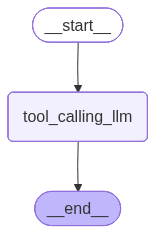

In [19]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
    
# Node
def tool_calling_llm(state: MessagesState):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(MessagesState)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_edge(START, "tool_calling_llm")
builder.add_edge("tool_calling_llm", END)
graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))

If we pass in `Hello!`, the LLM responds without any tool calls.

In [20]:
messages = graph.invoke({"messages": HumanMessage(content="Hello!")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Hello!
================================== Ai Message ==================================

Hello! How can I assist you today?


The LLM chooses to use a tool when it determines that the input or task requires the functionality provided by that tool.

In [21]:
messages = graph.invoke({"messages": HumanMessage(content="Multiply 2 and 3")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Multiply 2 and 3
================================== Ai Message ==================================
Tool Calls:
  multiply (call_7RvCEVExfgGjXA3X1Gwox44q)
 Call ID: call_7RvCEVExfgGjXA3X1Gwox44q
  Args:
    a: 2
    b: 3
